# Append season

In [1]:
import pandas as pd
import geopandas as gp
import os

In [8]:
cols = ['uuid', 'source', 'orig_id', 'lat', 'lon', 'month']
df = pd.read_csv('./sample_data/02_metadata_common_attributes.csv')[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   uuid     2319 non-null   object 
 1   source   2319 non-null   object 
 2   orig_id  2319 non-null   int64  
 3   lat      2319 non-null   float64
 4   lon      2319 non-null   float64
 5   month    2319 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 108.8+ KB


In [9]:
# assign seasons
import datetime
from tqdm.auto import tqdm
tqdm.pandas()

season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'
}

season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'
}
        
def datetime_to_season(row):
    month = row['month']
    if row['lat'] >= 0:
        return season_month_north[month]
    else:
        return season_month_south[month]

df['season'] = df.progress_apply(lambda row: datetime_to_season(row), axis=1)
df.season.value_counts()

  0%|          | 0/2319 [00:00<?, ?it/s]

Summer    2319
Name: season, dtype: int64

In [10]:
cols = ['uuid', 'city_id']
sm = pd.read_csv('./sample_data/01_simplemaps.csv')[cols]
df = df.merge(sm, on='uuid', how='left')
cols = ['city_id', 'koppen_geiger_zone', 'zone_description']
climate = pd.read_csv('./sample_data/cities.csv')[cols]
df = df.merge(climate, on='city_id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                2319 non-null   object 
 1   source              2319 non-null   object 
 2   orig_id             2319 non-null   int64  
 3   lat                 2319 non-null   float64
 4   lon                 2319 non-null   float64
 5   month               2319 non-null   int64  
 6   season              2319 non-null   object 
 7   city_id             2319 non-null   int64  
 8   koppen_geiger_zone  2319 non-null   object 
 9   zone_description    2319 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 199.3+ KB


## Modify season based on climate zone

In [11]:
from tqdm.auto import tqdm
tqdm.pandas()

def modify_season(row):
    zone = row['zone_description']
    if 'Tropical' in zone:
        return 'Tropical'
    elif ' tropical ' in zone:
        return 'Tropical'
    else:
        return row['season']

df['season'] = df.progress_apply(lambda row: modify_season(row), axis=1)

  0%|          | 0/2319 [00:00<?, ?it/s]

In [12]:
df.season.value_counts()

Summer      1725
Tropical     594
Name: season, dtype: int64

<AxesSubplot:>

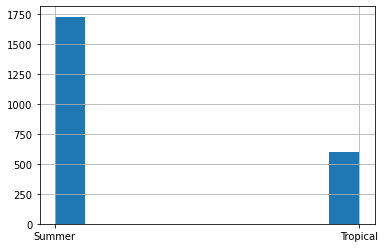

In [13]:
df.season.hist()

In [15]:
cols = ['uuid', 'source', 'orig_id', 'season']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 2318
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   uuid     2319 non-null   object
 1   source   2319 non-null   object
 2   orig_id  2319 non-null   int64 
 3   season   2319 non-null   object
dtypes: int64(1), object(3)
memory usage: 90.6+ KB


In [16]:
df.to_csv('./sample_data/04_season.csv', index=False)